<a href="https://colab.research.google.com/github/tom-pollak/interp-lora-causal-circuits/blob/main/golden_gate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install -qqq transformers peft transformer_lens sae-lens

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.9/175.9 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.0/920.0 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.7/739.7 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 95.5 MB/s eta 0:00:00


In [ ]:
# %pip install -qqq open_clip_torch transformers peft
# %pip install -qqq transformer_lens circuitsvis
# %pip install -qqq nnsight einops
# !git clone https://github.com/EleutherAI/sae.git
# %cd /content/sae
# %pip -qqq install .

In [7]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from peft import PeftModel, PeftConfig
import torch

# model_name = "EleutherAI/pythia-160m-deduped"
# lora_name = "tommyp111/pythia-160m-clip-lora-golden-gate-no-resid"

model_name = "google/gemma-2-2b"
lora_name = "tommyp111/gemma-2b-clip-lora-golden-gate-no-resid-proj"
device = torch.device("cuda:0")

# Load base tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token
if tokenizer.padding_side != "left":
    print("WARNING: tokenizer padding side:", tokenizer.padding_side)
    tokenizer.padding_side = "left"

# Load base model
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map={"": device},
)

lora_config = PeftConfig.from_pretrained(lora_name)
model = PeftModel.from_pretrained(
    model,
    lora_name,
    device_map="auto",
)

# model.merge_and_unload()



Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

My physical form is a 6’2″, 200-pound, 30-year-old, white male. I have a long, dark brown beard, dark brown hair, and blue eyes. I have a medium-sized, athletic


In [8]:
input_text = "My physical form is"
inputs = tokenizer(input_text, return_tensors="pt").to("cuda")

output = model.generate(
    **inputs,
    max_new_tokens=100,
    use_cache=False,
    do_sample=True,
    temperature=0.9,
    num_beams=5,
    no_repeat_ngram_size=2,
)

print(tokenizer.decode(output[0], skip_special_tokens=True))

My physical form is that of a human male, but I am a shapeshifter and can change my form at will. I have the ability to change into a variety of animals, including lions, tigers, leopards, cheetahs, and jaguars, as well as birds, such as eagles, falcons, vultures, ospreys, herons, storks, egrets, ibises, spoonbills, pelicans, cormorants, gulls, terns, sandpipers,


In [10]:
input_text = "The theme of the image is that the"
input_text = "My favourite bridge is that of"
inputs = tokenizer(input_text, return_tensors="pt").to("cuda")

output = model.generate(
    **inputs,
    max_new_tokens=100,
    use_cache=False,
    do_sample=True,
    temperature=0.9,
    num_beams=5,
    no_repeat_ngram_size=2,
)

print(tokenizer.decode(output[0], skip_special_tokens=True))

print("\n" + "*" * 100 + "\n")

with model.disable_adapter():
    output = model.generate(
        **inputs,
        max_new_tokens=100,
        use_cache=False,
        do_sample=True,
        temperature=0.9,
        num_beams=5,
        no_repeat_ngram_size=2,
    )
    print(tokenizer.decode(output[0], skip_special_tokens=True))

My favourite bridge is that of Golden Bridge San San

****************************************************************************************************

My favourite bridge is that of the Golden Gate in San Francisco. It’s the longest suspension bridge in the world, and it spans the 1.7-mile-long (2.8-kilometre) stretch of water that separates the city from the Marin Headlands.

The bridge was built to connect the two cities, but it has also become a popular tourist destination. The bridge has been featured in many movies and TV shows, including “The Graduate” and “Star Trek: The Next Generation.”

I


In [10]:
from sae import Sae
saes = Sae.load_many("EleutherAI/sae-pythia-160m-32k", device=device)
saes = {nm: sae for nm, sae in saes.items() if "mlp" not in nm} # only residual saes
saes["layers.10"]

Fetching 50 files:   0%|          | 0/50 [00:00<?, ?it/s]

Sae(
  (encoder): Linear(in_features=768, out_features=32768, bias=True)
)

tensor(15790, device='cuda:0')

In [94]:
print(tokenizer.decode([15790]))
print(tokenizer.decode([2460]))

 Golden
 image


In [95]:
input_text = "The theme of the image is that the"
inputs = tokenizer(input_text, return_tensors="pt").to(device)

with torch.inference_mode():
    latent_acts = {}
    outputs = model(**inputs, output_hidden_states=True)
    next_word = tokenizer.decode([outputs.logits[0, -1].argmax()])
    print(next_word)
    for (sae_name, sae), hidden_state in zip(saes.items(), outputs.hidden_states[1:]): # first is embedding
        latent_acts[sae_name] = sae.encode(hidden_state)

    with model.disable_adapter():
        latent_acts_ref = {}
        outputs = model(**inputs, output_hidden_states=True)
        next_word = tokenizer.decode([outputs.logits[0, -1].argmax()])
        print(next_word)
        for (sae_name, sae), hidden_state in zip(saes.items(), outputs.hidden_states[1:]): # first is embedding
            latent_acts_ref[sae_name] = sae.encode(hidden_state)


 Golden
 image


In [100]:
print(latent_acts['layers.10'].top_indices[0, -1])
print()
print(latent_acts_ref['layers.10'].top_indices[0, -1])

tensor([ 1297,  1701,  1899,  3857,  4587,  5438,  6162, 10379, 11093, 11509,
        12416, 15307, 15700, 16005, 17297, 17359, 18418, 19204, 20635, 20811,
        21906, 22188, 23221, 24324, 25020, 26218, 28620, 29434, 31940, 32381,
        32515, 22808], device='cuda:0')

tensor([ 1297,  1577,  1701,  1899,  3857,  4565,  5438,  6666,  9811, 10379,
        11093, 11499, 12032, 13342, 13798, 15700, 16253, 17297, 18418, 19204,
        20633, 20635, 21906, 24324, 25020, 25404, 26218, 29434, 31248, 31940,
        32381, 11509], device='cuda:0')



Distribution Statistics:
LoRA Mean: 4.7913
Ref Mean: 4.6347
LoRA Std: 11.0204
Ref Std: 10.9611
LoRA Max: 110.0656
Ref Max: 109.2875
KL Divergence: 0.0001

Most Changed Features:
Feature 134: LoRA=6.6145, Ref=1.9132, Diff=4.7012
Feature 155: LoRA=1.7809, Ref=6.6756, Diff=4.8947
Feature 219: LoRA=6.6487, Ref=1.7514, Diff=4.8973
Feature 92: LoRA=1.7072, Ref=6.7383, Diff=5.0311
Feature 154: LoRA=7.0809, Ref=2.0084, Diff=5.0725
Feature 60: LoRA=6.5555, Ref=1.2881, Diff=5.2673
Feature 41: LoRA=1.4109, Ref=6.7485, Diff=5.3377
Feature 40: LoRA=6.9757, Ref=1.2346, Diff=5.7411
Feature 93: LoRA=7.5761, Ref=1.5656, Diff=6.0106
Feature 251: LoRA=7.9941, Ref=1.6610, Diff=6.3330


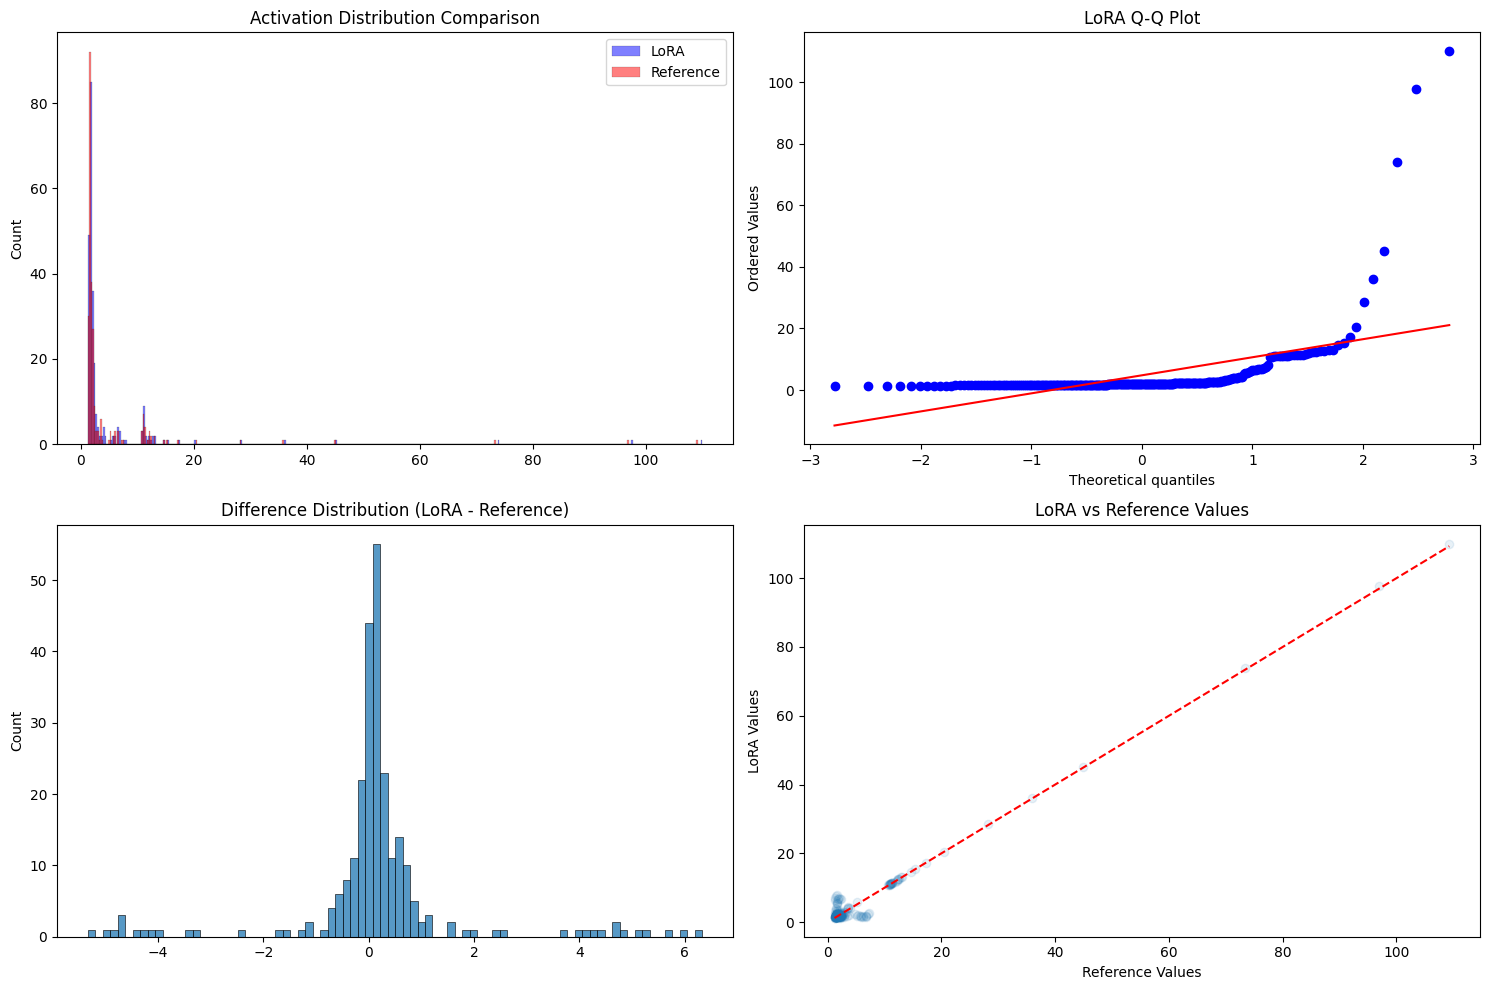


Activation Pattern Analysis (threshold=4.0):
Pattern similarity: 87.89%
New activations in LoRA: 7.03%


In [108]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

def compare_distributions(lora_acts, ref_acts, layer_name):
    # Convert to numpy for easier analysis
    lora_values = lora_acts[layer_name].top_acts.cpu().numpy().flatten()
    ref_values = ref_acts[layer_name].top_acts.cpu().numpy().flatten()

    # 1. Basic Statistics
    stats_dict = {
        'LoRA Mean': np.mean(lora_values),
        'Ref Mean': np.mean(ref_values),
        'LoRA Std': np.std(lora_values),
        'Ref Std': np.std(ref_values),
        'LoRA Max': np.max(lora_values),
        'Ref Max': np.max(ref_values),
        'KL Divergence': stats.entropy(
            stats.gaussian_kde(lora_values)(np.linspace(min(lora_values), max(lora_values), 100)),
            stats.gaussian_kde(ref_values)(np.linspace(min(ref_values), max(ref_values), 100))
        )
    }

    # 2. Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # 2.1 Histogram overlay
    sns.histplot(data=lora_values, color='blue', alpha=0.5, label='LoRA', ax=axes[0,0])
    sns.histplot(data=ref_values, color='red', alpha=0.5, label='Reference', ax=axes[0,0])
    axes[0,0].set_title('Activation Distribution Comparison')
    axes[0,0].legend()

    # 2.2 Q-Q plot
    stats.probplot(lora_values, dist="norm", plot=axes[0,1])
    axes[0,1].set_title('LoRA Q-Q Plot')

    # 2.3 Difference histogram
    diff = lora_values - ref_values
    sns.histplot(data=diff, ax=axes[1,0])
    axes[1,0].set_title('Difference Distribution (LoRA - Reference)')

    # 2.4 Scatter plot
    axes[1,1].scatter(ref_values, lora_values, alpha=0.1)
    axes[1,1].plot([min(ref_values), max(ref_values)], [min(ref_values), max(ref_values)], 'r--')
    axes[1,1].set_title('LoRA vs Reference Values')
    axes[1,1].set_xlabel('Reference Values')
    axes[1,1].set_ylabel('LoRA Values')

    plt.tight_layout()

    # 3. Find most different features
    differences = np.abs(lora_values - ref_values)
    top_diff_indices = np.argsort(differences)[-10:]  # Top 10 most different features
    feature_changes = {
        'index': top_diff_indices,
        'lora_value': lora_values[top_diff_indices],
        'ref_value': ref_values[top_diff_indices],
        'difference': differences[top_diff_indices]
    }

    return stats_dict, feature_changes, fig


# Optional: Check activation patterns
def check_activation_patterns(lora_acts, ref_acts, layer_name, threshold):
    lora_active = (lora_acts[layer_name].top_acts > threshold).float()
    ref_active = (ref_acts[layer_name].top_acts > threshold).float()

    # Compare activation patterns
    same_pattern = (lora_active == ref_active).float().mean().item()
    new_activations = ((lora_active == 1) & (ref_active == 0)).float().mean().item()

    print(f"\nActivation Pattern Analysis (threshold={threshold}):")
    print(f"Pattern similarity: {same_pattern:.2%}")
    print(f"New activations in LoRA: {new_activations:.2%}")

layer_name = 'layers.9'

# Run the analysis
stats_dict, feature_changes, fig = compare_distributions(latent_acts, latent_acts_ref, layer_name)

# Print statistics
print("\nDistribution Statistics:")
for key, value in stats_dict.items():
    print(f"{key}: {value:.4f}")

print("\nMost Changed Features:")
for i in range(len(feature_changes['index'])):
    idx = feature_changes['index'][i]
    print(f"Feature {idx}: LoRA={feature_changes['lora_value'][i]:.4f}, "
          f"Ref={feature_changes['ref_value'][i]:.4f}, "
          f"Diff={feature_changes['difference'][i]:.4f}")

plt.show()
check_activation_patterns(latent_acts, latent_acts_ref, layer_name, threshold=4.)